<a href="https://colab.research.google.com/github/Nitha9/100-Days-Of-ML-Code/blob/master/Churn_Predict_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [ ]:
import pandas as pd
import numpy as np
import io

In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['Churn_Modelling.csv']))

Display first 5 rows

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Check last 5 rows

In [ ]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


Check the shape of the data

In [ ]:
data.shape

(10000, 14)

In [ ]:
print("Number of Rows", data.shape[0])
print("Number of columns", data.shape[1])

Number of Rows 10000
Number of columns 14


Get information about the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Check null values

In [ ]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Get overall statistics about the data

In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
data.describe(include = 'all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


Dropping irrelevant values

In [ ]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Encoding of categorical data

In [ ]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
data = pd.get_dummies(data, drop_first = True)

In [ ]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Handling Imbalanced Data

In [ ]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


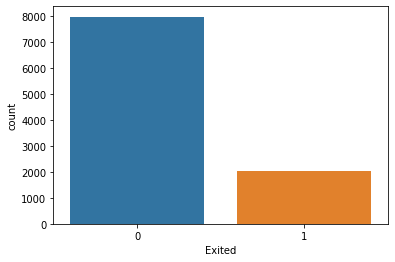

In [ ]:
sns.countplot(data['Exited'])

In [ ]:
x = data.drop('Exited', axis = 1)
y = data['Exited']

Handling Imbalanced Data using SMOTE (synthetic minorty oversampling Technique)


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
x_res,y_res =SMOTE().fit_resample(x,y)

In [ ]:
x_res.value_counts()

CreditScore  Age  Tenure  Balance        NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  Gender_Male
350          39   0       109733.200000  2              0          0               123602.110000    1                  0                1              1
688          26   8       146133.390000  1              1          1               175296.760000    1                  0                1              1
687          52   6       76245.634982   1              0          0               145761.053463    0                  0                0              1
                  9       109965.180116  1              0          0               184087.341690    0                  0                0              1
             53   7       138098.591447  1              0          0               130618.344125    0                  0                0              1
                                                                                       

In [ ]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

Split the data into training and test data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 42, stratify = y)

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[ 1.058568  ,  1.71508648,  0.68472287, ..., -0.57831252,
        -0.57773517,  0.90750738],
       [ 0.91362605, -0.65993547, -0.6962018 , ...,  1.72916886,
        -0.57773517,  0.90750738],
       [ 1.07927399, -0.18493108, -1.73189531, ...,  1.72916886,
        -0.57773517, -1.10191942],
       ...,
       [ 0.16821031, -0.18493108,  1.3751852 , ..., -0.57831252,
        -0.57773517, -1.10191942],
       [ 0.37527024, -0.37493284,  1.02995403, ..., -0.57831252,
         1.73089688,  0.90750738],
       [ 1.56586482,  1.14508121,  0.68472287, ..., -0.57831252,
         1.73089688,  0.90750738]])

In [ ]:
x_test

array([[-0.68073539, -0.27993196,  0.68472287, ..., -0.57831252,
        -0.57773517,  0.90750738],
       [-1.30191518, -0.5649346 , -0.35097064, ...,  1.72916886,
        -0.57773517,  0.90750738],
       [-0.97061929,  0.10007155, -0.35097064, ..., -0.57831252,
         1.73089688, -1.10191942],
       ...,
       [-1.39509214,  0.7650777 ,  1.3751852 , ...,  1.72916886,
        -0.57773517, -1.10191942],
       [ 0.39597623,  0.00507067,  0.68472287, ..., -0.57831252,
        -0.57773517,  0.90750738],
       [ 1.02750901, -0.5649346 , -1.04143297, ..., -0.57831252,
        -0.57773517,  0.90750738]])

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression()

In [ ]:
log.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = log.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.808

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
precision_score(y_test,y_pred)

0.5891472868217055

In [ ]:
recall_score(y_test,y_pred)

0.18673218673218672

In [ ]:
f1_score(y_test,y_pred)

0.2835820895522388

Resample

In [ ]:
x_train, x_test,y_train, y_test = train_test_split(x_res,y_res,test_size = 0.20, random_state = 42)

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[-2.17056516,  1.21300433,  1.17176087, ..., -0.57275798,
        -0.46425518, -0.85112747],
       [ 1.10613712,  0.1054594 , -1.39423545, ..., -0.57275798,
        -0.46425518,  1.17491214],
       [-0.35139266,  0.70957481,  0.43861906, ...,  1.74593813,
        -0.46425518, -0.85112747],
       ...,
       [ 0.20750974,  0.2061453 ,  1.17176087, ..., -0.57275798,
        -0.46425518,  1.17491214],
       [ 0.54723473, -0.59934193, -1.39423545, ..., -0.57275798,
        -0.46425518, -0.85112747],
       [ 0.53627586,  1.01163252, -1.39423545, ...,  1.74593813,
        -0.46425518,  1.17491214]])

In [ ]:
x_test

array([[-1.23906117, -1.20345735,  0.07204816, ..., -0.57275798,
        -0.46425518, -0.85112747],
       [-0.46098136,  0.00477349, -0.29452274, ...,  1.74593813,
        -0.46425518, -0.85112747],
       [ 0.34997506, -1.00208554,  1.53833177, ..., -0.57275798,
         2.15398783, -0.85112747],
       ...,
       [ 0.10887991, -0.29728422,  0.43861906, ..., -0.57275798,
        -0.46425518, -0.85112747],
       [ 1.11709599,  1.11231843,  0.43861906, ...,  1.74593813,
        -0.46425518, -0.85112747],
       [-0.51577571,  1.01163252,  1.17176087, ..., -0.57275798,
        -0.46425518, -0.85112747]])

In [ ]:
log = LogisticRegression()

In [ ]:
log.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = log.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.7871939736346516

In [ ]:
precision_score(y_test, y_pred)

0.7729257641921398

In [ ]:
recall_score(y_test, y_pred)

0.7978106889890535

In [ ]:
f1_score(y_test,y_pred)

0.7851711026615971

SVC

In [ ]:
from sklearn import svm

In [ ]:
svm= svm.SVC()

In [ ]:
svm.fit(x_train, y_train)

SVC()

In [ ]:
y_pred2 = svm.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred2)

0.844632768361582

In [ ]:
precision_score(y_test, y_pred2)

0.8298004987531172

In [ ]:
recall_score(y_test, y_pred2)

0.8570508692852543

KNN classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred3 = knn.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred3)

0.8279974890144381

In [ ]:
precision_score(y_test, y_pred3)

0.8014397120575885

In [ ]:
recall_score(y_test,y_pred3)

0.8602704443013522

Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred4=dt.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred4)

0.7928436911487758

In [ ]:
precision_score(y_test,y_pred4)

0.7788881948782012

In [ ]:
recall_score(y_test,y_pred4)

0.8029620090148101

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred5 = rf.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred5)

0.8615819209039548

In [ ]:
precision_score(y_test,y_pred5)

0.844059405940594

In [ ]:
recall_score(y_test, y_pred5)

0.8783000643915003

Gradient Bosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier()

In [ ]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred6 = gbc.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred6)

0.8483992467043314

In [ ]:
precision_score(y_test,y_pred6)

0.8381795195954488

In [ ]:
recall_score(y_test,y_pred6)

0.8538312942691565

XG Boost

In [ ]:
import xgboost as xgb

In [ ]:
xgc = xgb.XGBClassifier()

In [ ]:
xgc.fit(x_train,y_train)

XGBClassifier()

In [ ]:
y_pred7= xgc.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred7)

0.8483992467043314

In [ ]:
recall_score(y_test,y_pred7)

0.8544752092723761

In [ ]:
precision_score(y_test,y_pred7)

0.8377525252525253

Saving the model

In [ ]:
final_data = pd.DataFrame({'Models': ['LR', 'SVC', 'KNN', 'DT','RF','GBC','XGC'],'ACC': [accuracy_score(y_test, y_pred),
                                                                                         accuracy_score(y_test, y_pred2),
                                                                                         accuracy_score(y_test, y_pred3),
                                                                                         accuracy_score(y_test, y_pred4),
                                                                                         accuracy_score(y_test, y_pred5),
                                                                                         accuracy_score(y_test, y_pred6),
                                                                                         accuracy_score(y_test, y_pred7)]})

In [ ]:
final_data 

,Models,ACC
0,LR,0.787194
1,SVC,0.844633
2,KNN,0.827997
3,DT,0.792844
4,RF,0.861582
5,GBC,0.848399
6,XGC,0.848399


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


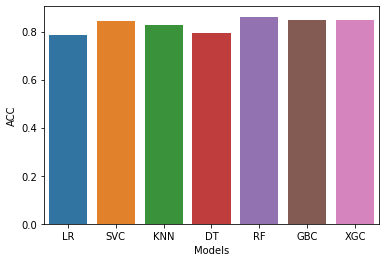

In [ ]:
sns.barplot(final_data['Models'],final_data['ACC'])

Save the Model

In [ ]:
x_res = sc.fit_transform(x_res)

In [ ]:
rf.fit(x_res,y_res)

RandomForestClassifier()

In [ ]:
import joblib

In [ ]:
joblib.dump(rf, 'churn_predict_model')

['churn_predict_model']

In [ ]:
model = joblib.load('churn_predict_model')

In [ ]:
model.predict([[619,42,2,0.0,0,0,0,101348.88,0,0,0]])

array([1])